## СТАРТОВЫЙ МОДУЛЬ
---
ДАННЫЙ МОДУЛЬ ПРЕДНАЗНАЧЕН ДЛЯ ИНИЦИИРОВАНИЯ МИКРОСХЕМЫ IMU, ЗАПУСКА ЦИКЛА СЧИТЫВАНИЯ ПОКАЗАНИЙ СЕНСОРОВ. ТАКЖЕ МОДУЛЬ ОТВЕЧАЕТ ЗА ОРГАНИЗАЦИЮ МНОГОПРОЦЕССНОЙ РАБОТЫ ВСЕХ УРОВНЕЙ ПО ПРОЕКТА

### Блок импорта библиотек необходимых для работы проекта

In [1]:
# Подключить библиотеки для мат обработки данных и генерации случайных данных
import numpy as np
import random
import math
import copy

# Подключить библиотеки для работы с 2D графиками
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter

# Подключить библиотеки для работы анимацией
import matplotlib.animation as an

# Подключить библиотеки для работы с виджетами в Jupyter Lab
import ipywidgets as widgets
from   ipywidgets import Output
from IPython.display import display

# Подключить библиотеки для работы с завершающими функциями Jupyter Lab
import atexit

# Подключить библиотеки для работы с датой/временем
from datetime import datetime
from time import sleep

# Подключить библиотеки для асинхронной работы
import asyncio

# Подключить пользовательские модули
# ---
# Работа с интервалами в стиле setInterval JavaScript
from py.lib.lib_setinterval_rev01_v01 import SetInterval
# Подключить модуль для работы с датчиком IMU ICM20948
from py.lib.lib_imu_20948_horizon_rev01_v03 import *
# Подключить модуль для работы с 2D фигурами
#from py.lib.lib_figure2D_rev01_v01 import Figure2D
from py.lib.lib_figure2D_rev01_v02 import Figure2D

/usr/local/lib/python3.9/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Блок настроек среды исполнения Jupyter lab

In [2]:
# Задать режим работы отображения графической информации
%matplotlib  widget

# Инструкция требующая повторно перезагружать пользовательские функции после изменения их кода
%load_ext autoreload
%autoreload 2

### Блок настроек параметров 2D фигур и других других связанных с отображением

In [3]:
# Создать объект содержащий настройки графиков 'сырых данных Акселерометра
acc_opt_raw = {
                'figsize': (10, 8),
                'nrows': 3,
                'suptitle': 'ГРАФИК НЕ ОБРАБОТАННЫХ ДАННЫХ АКСЕЛЕРОМЕТРА',
                'abscissa': 'N',
                'ordinate': ('X', 'Y', 'Z'),
                'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
                'alpha': (0.5, 0.5, 0.5),
                'graphcolor': ('green', 'blue', 'red'),
                'xlim': (0, 50),
                'ylim': (-2, 2) }

In [4]:
# Создать объект содержащий настройки графиков усредненных данных Акселерометра
acc_opt_avg = {
                'figsize': (10, 8),
                'nrows': 3,
                'suptitle': 'ГРАФИК УСРЕДНЕННЫХ ДАННЫХ АКСЕЛЕРОМЕТРА',
                'abscissa': 'N',
                'ordinate': ('X', 'Y', 'Z'),
                'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
                'alpha': (0.5, 0.5, 0.5),
                'graphcolor': ('green', 'blue', 'red'),
                'xlim': (0, 50),
                'ylim': (-2, 2) }

In [5]:
# Создать объект содержащий настройки графиков 'сырых' данных Гироскопа
gyro_opt_raw = {
                'figsize': (10, 8),
                'nrows': 3,
                'suptitle': 'ГРАФИК НЕ ОБРАБОТАННЫХ ДАННЫХ ГИРОСКОПА',
                'abscissa': 'N',
                'ordinate': ('X', 'Y', 'Z'),
                'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
                'alpha': (0.5, 0.5, 0.5),
                'graphcolor': ('green', 'blue', 'red'),
                'xlim': (0, 50),
                'ylim': (-500, 500) }

In [6]:
# Создать объект содержащий настройки графиков усредненных данных Гироскопа
gyro_opt_avg = {
                'figsize': (10, 8),
                'nrows': 3,
                'suptitle': 'ГРАФИК УСРЕДНЕННЫХ ДАННЫХ ГИРОСКОПА',
                'abscissa': 'N',
                'ordinate': ('X', 'Y', 'Z'),
                'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
                'alpha': (0.5, 0.5, 0.5),
                'graphcolor': ('green', 'blue', 'red'),
                'xlim': (0, 50),
                'ylim': (-500, 500) }

In [7]:
# Создать объект содержащий настройки графиков 'сырых' данных Магнитометра
mag_opt_raw = {
                'figsize': (10, 8),
                'nrows': 3,
                'suptitle': 'ГРАФИК НЕ ОБРАБОТАННЫХ ДАННЫХ МАГНИТОМЕТРА',
                'abscissa': 'N',
                'ordinate': ('X', 'Y', 'Z'),
                'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
                'alpha': (0.5, 0.5, 0.5),
                'graphcolor': ('green', 'blue', 'red'),
                'xlim': (0, 50),
                'ylim': (-500, 500) }

In [8]:
# Создать объект содержащий настройки графиков усредненных данных Магнитометра
mag_opt_avg = {
                'figsize': (10, 8),
                'nrows': 3,
                'suptitle': 'ГРАФИК УСРЕДНЕННЫХ ДАННЫХ МАГНИТОМЕТРА',
                'abscissa': 'N',
                'ordinate': ('X', 'Y', 'Z'),
                'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
                'alpha': (0.5, 0.5, 0.5),
                'graphcolor': ('green', 'blue', 'red'),
                'xlim': (0, 50),
                'ylim': (-500, 500) }

### Блок считывания данных с сенсоров: Акселерометра, Гироскопа, Магнитометра

In [ ]:
# Глобальный массив, хранит углы Эйлера полученные с помощью акселерометра. является копией соответствующего массива класса ReadSensorIMU
AccArrAngle  = []
# Глобальный массив, хранит углы Эйлера полученные с помощью гироскопа. является копией соответствующего массива класса ReadSensorIMU
GyroArrAngle = []
# Глобальный массив, хранит углы Эйлера полученные с помощью фильтра слияния. является копией соответствующего массива класса ReadSensorIMU
CompArrAngle = []

# Создать алиасы индексов соответствующих под-массивов
Roll_index  = 0
Pitch_index = 1
Yaw_index   = 2

In [9]:
# Подключить модуль для работы с датчиком IMU ICM20948
# from py.lib.lib_imu_20948_horizon_rev01_v03 import *

'''
    Класс чтения данных с трех сенсоров: Акселерометра, Гироскопа, Магнитометра.
'''
class ReadSensorIMU:
    def __init__(self, _opts) -> None:
        self.FigureOpt      = _opts            # хранит набор характеристик 2D фигуры
        self.ValueLimRaw1   = 4                # окно усреднение данных
        self.ValueLimRaw    = _opts['xlim'][1] # ограничитель - количество 'сырых' значений хранящихся в массивах AccArrRaw/ GyroArrRaw/ MagArrRaw
        self.ValueLimAvg    = _opts['xlim'][1] # ограничитель - количество усредненных значений хранящихся в массивах AccArrAvg/ GyroArrAvg/ MagAvgArr

        self.GyroFullScale = 1000 # величина настроенного диапазона Гироскопа (+/-) 1000 град/сек
        self.GyroSampleRate = 50  # частота семплирования Гироскопа - 50Hz
        self.GyroLowPass = 3      # фильтрация Гироскопа ~ 50Hz

        self.AccFullScale = 2     # величина настроенного диапазона Акселерометра (+/-) 2g
        self.AccSampleRate = 50   # частота семплирования Акселерометра - 50Hz
        self.AccLowPass = 3       # фильтрация Акселерометра ~ 50Hz

        self.MagSampleRate = 50   # частота семплирования Магнитометра - 50Hz

        self.ICM20948 = ICM20948( gfs=self.GyroFullScale\
                                 ,gsr=self.GyroSampleRate\
                                 ,glp=self.GyroLowPass\
                                 ,afs=self.AccFullScale\
                                 ,asr=self.AccSampleRate
                                 ,alp=self.AccLowPass\
                                 ,msm=self.MagSampleRate) # инстанцировать модуль для работы с датчиком IMU ICM20948 

        # Введём именованные константы X, Y, Z
        self.X, self.Y, self.Z          = (0, 1, 2)
        self.Roll, self.Pitch, self.Yaw = (0, 1, 2) 

        self.AccRaw  = [0, 0, 0] # массив 'сырых', мгновенных значений  Акселерометра, по одному значению на каждую ось [X, Y, Z]
        self.GyroRaw = [0, 0, 0] # массив 'сырых', мгновенных значений  Гироскопа,     по одному значению на каждую ось [X, Y, Z]
        self.MagRaw  = [0, 0, 0] # массив 'сырых', мгновенных значений  Магнитометра,  по одному значению на каждую ось [X, Y, Z]

        self.AccAvg  = [0, 0, 0] # массив средних, мгновенных значений  Акселерометра, по одному значению на каждую ось [X, Y, Z]
        self.GyroAvg = [0, 0, 0] # массив средних, мгновенных значений  Гироскопа,     по одному значению на каждую ось [X, Y, Z]
        self.MagAvg  = [0, 0, 0] # массив средних, мгновенных значений  Магнитометра,  по одному значению на каждую ось [X, Y, Z]
        
        # Набор итоговых тройных массивов для хранения  'сырых' данных от трех (3) сенсоров, по трем (3) осям
        self.AccArrRaw  = [ [0]*self.ValueLimRaw, [0]*self.ValueLimRaw, [0]*self.ValueLimRaw ] # заполнить массив '0' значениями
        self.GyroArrRaw = [ [0]*self.ValueLimRaw, [0]*self.ValueLimRaw, [0]*self.ValueLimRaw ] # заполнить массив '0' значениями
        self.MagArrRaw  = [ [0]*self.ValueLimRaw, [0]*self.ValueLimRaw, [0]*self.ValueLimRaw ] # заполнить массив '0' значениями

        # Набор итоговых тройных массивов для хранения усредненных данных от трех (3) сенсоров, по трем (3) осям
        self.AccArrAvg   = [ [0]*self.ValueLimAvg, [0]*self.ValueLimAvg, [0]*self.ValueLimAvg ] # заполнить массив '0' значениями
        self.GyroArrAvg  = [ [0]*self.ValueLimAvg, [0]*self.ValueLimAvg, [0]*self.ValueLimAvg ] # заполнить массив '0' значениями
        self.MagArrAvg   = [ [0]*self.ValueLimAvg, [0]*self.ValueLimAvg, [0]*self.ValueLimAvg ] # заполнить массив '0' значениями

        self.TempRaw     = 0                    # Текущее значение температуры встроенного в ICM20948 термодатчика
        self.TempArrRaw  = [0]*self.ValueLimRaw # Массив текущих значений встроенного в ICM20948 термодатчика

        # Прочитать данные один раз - дать 'толчок' для постоянной работы датчика IMU
        self.MagRaw = self.ICM20948.read_magnetometer_data()
        self.AccRaw, self.GyroRaw = self.ICM20948.read_accelerometer_gyro_data()
        
        # Поля для хранения времени для вычисления угла
        self.TimeNewAngle=time.time()
        self.TimeOldAngle=time.time()
        
        # Зададим коэффициент альфа, для расчета углов в комплементарном фильтре
        self.Alpha = 0.98

        #Углы Эйлера полученные с помощью акселерометра
        self.AccArrAngle = [ [0]*self.ValueLimRaw, [0]*self.ValueLimRaw, [0]*self.ValueLimRaw ]

        #Углы Эйлера полученные с помощью гироскопа
        self.GyroArrAngle = [ [0]*self.ValueLimRaw, [0]*self.ValueLimRaw, [0]*self.ValueLimRaw ]
        
        #Углы Эйлера после фильтра слияния
        self.CompArrAngle = [ [0]*self.ValueLimRaw, [0]*self.ValueLimRaw, [0]*self.ValueLimRaw ]
    '''
    
    '''
    def UpdateIMU(self):
        self.TimeNewAngle = time.time() # Зафиксировать время считывания данных
        # Получить'сырые' данные от всех датчиков IMU20948
        self.AccRaw, self.GyroRaw, self.MagRaw, self.TempRaw = self.ICM20948.read_full_data() # считать показания датчиков модуля ICM20948

        # Добавить одиночное показание Термодатчика в массив 'сырых' данных
        self.TempArrRaw.append(self.TempRaw)
        # Отслеживать размер массива 'сырых' данных
        if len(self.TempArrRaw) > self.ValueLimRaw:
            self.TempArrRaw.pop(0)
        
        # Добавить данные от трех датчиков по трем осям в массив 'сырых' данных и усредненных
        for i in range(3):
            # Добавить 'сырые' данные Акселерометра
            self.AccArrRaw[i].append(self.AccRaw[i])
            # Отслеживать размер массива 'сырых' данных
            if len(self.AccArrRaw[i]) > self.ValueLimRaw:
                self.AccArrRaw[i].pop(0)

            # Добавить 'сырые' данные Гироскопа
            self.GyroArrRaw[i].append(self.GyroRaw[i])
            # Отслеживать размер массива 'сырых' данных
            if len(self.GyroArrRaw[i]) > self.ValueLimRaw:
                self.GyroArrRaw[i].pop(0)
            
            # Добавить 'сырые' данные Магнитометра
            self.MagArrRaw[i].append(self.MagRaw[i])
            # Отслеживать размер массива 'сырых' данных
            if len(self.MagArrRaw[i]) > self.ValueLimRaw:
                self.MagArrRaw[i].pop(0)
            
            # Обновить усредненные данные по трем осям трех датчиков
            acc_avg  = sum( self.AccArrRaw[i][-self.ValueLimRaw1:]) / len( self.AccArrRaw[i][-self.ValueLimRaw1:])
            gyro_avg = sum(self.GyroArrRaw[i][-self.ValueLimRaw1:]) / len(self.GyroArrRaw[i][-self.ValueLimRaw1:])
            mag_avg  = sum( self.MagArrRaw[i][-self.ValueLimRaw1:]) / len( self.MagArrRaw[i][-self.ValueLimRaw1:])

            # Добавить усредненные данные Акселерометра
            self.AccArrAvg[i].append(acc_avg)
            # Отслеживать размер массива усредненных данных
            if len(self.AccArrAvg[i]) > self.ValueLimAvg:
                self.AccArrAvg[i].pop(0)
            
            # Добавить усредненные данные Гироскопа
            self.GyroArrAvg[i].append(gyro_avg)
            # Отслеживать размер массива усредненных данных
            if len(self.GyroArrAvg[i]) > self.ValueLimAvg:
                self.GyroArrAvg[i].pop(0)

            # Добавить усредненные данные Магнитометра
            self.MagArrAvg[i].append(mag_avg)
            # Отслеживать размер массива усредненных данных
            if len(self.MagArrAvg[i]) > self.ValueLimAvg:
                self.MagArrAvg[i].pop(0)
    '''
    
    '''
    def UpdateCompFilter(self):

        global AccArrAngle, GyroArrAngle, CompArrAngle

        # Вычислить разницу времени между получением данных с IMU сенсора
        dt = self.TimeNewAngle - self.TimeOldAngle
        self.TimeOldAngle = self.TimeNewAngle

        # Рассчитать углы Эйлера от канала акселерометра
        self.AccArrAngle[self.Roll].append(math.degrees(math.atan2(self.AccArrRaw[self.Y][-1], self.AccArrRaw[self.Z][-1])))
        self.AccArrAngle[self.Pitch].append(math.degrees(math.atan2(self.AccArrRaw[self.X][-1], self.AccArrRaw[self.Z][-1])))
        # Отслеживать размер массива 'сырых' данных
        if len(self.AccArrAngle[self.Roll]) > self.ValueLimRaw:
            self.AccArrAngle[self.Roll].pop(0)
            self.AccArrAngle[self.Pitch].pop(0)

        # Рассчитать углы Эйлера от канала гироскопа
        self.GyroArrAngle[self.Roll].append( self.GyroArrAngle[self.Roll][-1]+ self.GyroArrRaw[self.X][-1] * dt)
        self.GyroArrAngle[self.Pitch].append( self.GyroArrAngle[self.Pitch][-1]- self.GyroArrRaw[self.Y][-1] * dt)
        self.GyroArrAngle[self.Yaw].append( self.GyroArrAngle[self.Yaw][-1]+ self.GyroArrRaw[self.Z][-1] * dt)
        # Отслеживать размер массива 'сырых' данных
        if len(self.GyroArrAngle[self.Roll]) > self.ValueLimRaw:
            self.GyroArrAngle[self.Roll].pop(0)
            self.GyroArrAngle[self.Pitch].pop(0)
            self.GyroArrAngle[self.Yaw].pop(0)

        # Рассчитать углы Эйлера комплиментарным фильтром
        self.CompArrAngle[self.Roll].append( (self.Alpha)* (self.GyroArrAngle[self.Roll][-1])  + (1-self.Alpha)*self.AccArrAngle[self.Roll][-1] )
        self.CompArrAngle[self.Pitch].append( (self.Alpha)*(self.GyroArrAngle[self.Pitch][-1]) + (1-self.Alpha)*self.AccArrAngle[self.Pitch][-1] )
        self.CompArrAngle[self.Yaw].append(self.GyroArrAngle[self.Yaw][-1] )
        if len(self.CompArrAngle[self.Roll]) > self.ValueLimRaw:
             self.CompArrAngle[self.Roll].pop(0)
             self.CompArrAngle[self.Pitch].pop(0)
             self.CompArrAngle[self.Yaw].pop(0)
        
        #AccArrAngle  = copy.deepcopy(self.AccArrAngle)  # скопировать данные в глобальный массив
        #GyroArrAngle = copy.deepcopy(self.GyroArrAngle) # скопировать данные в глобальный массив
        #CompArrAngle = copy.deepcopy(self.CompArrAngle) # скопировать данные в глобальный массив

    '''
    
    '''
    def UpdateAll(self):
        self.UpdateIMU()
        self.UpdateCompFilter()


In [ ]:
def cleanup_imu():
    IMU.ICM20948.powerOff() # завершающий код для корректного выключения IMU
    print("Завершающая функция вызвана!")

# Регистрируем функцию cleanup_imu для вызова при завершении работы программы
atexit.register(cleanup_imu)

# Код пользователя
async def AsyncUpdate():
    AsyncFunc = SetInterval( 0.05, IMU.UpdateAll )
    AsyncFunc.start()

IMU = ReadSensorIMU( acc_opt_raw ) # инстанцировать объект IMU датчика
#asyncio.run( AsyncUpdate() )
await AsyncUpdate()


### Блок визуализации не обработанных данных Акселерометра

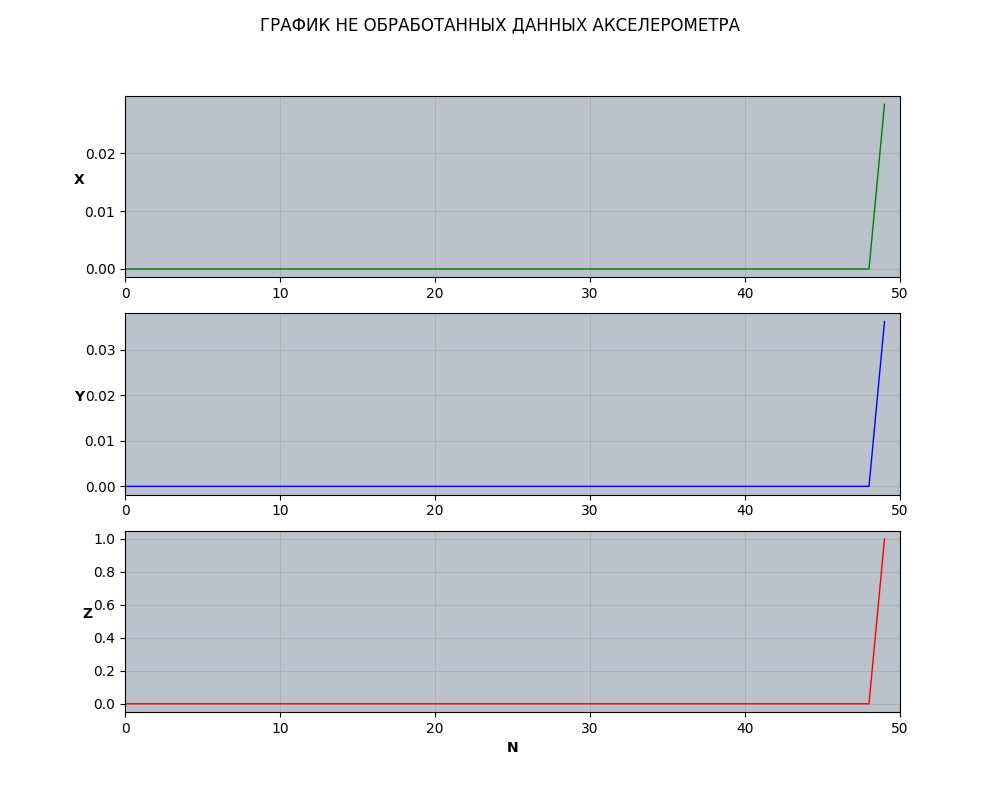

In [11]:
acc_grafics2D_raw = Figure2D( acc_opt_raw, IMU.AccArrRaw ) # инстанцировать объекта класса построения 2D фигур
acc_grafics2D_raw.CreateVectorFigure()      # Создать 'figure' matplotlib для построения тройного графика показаний датчика

acc_grafics2D_raw_anim = an.FuncAnimation( fig=acc_grafics2D_raw.Figure\
                                          ,func=acc_grafics2D_raw.UpdateAnimation\
                                          ,interval=200\
                                          ,frames=200\
                                          ,blit = True) # frames=50, save_count=1500
# grafics_2D_anim = an.FuncAnimation(fig=grafics_2D.Figure, func=grafics_2D.UpdateGraph, interval=200, frames=50, save_count=1500) # сохраняет 1 500 кадров ?
plt.show()

#Codec = an.writers['ffmpeg']
#VideoParam = Codec(fps=15, bitrate=1800) #metadata={'artist': 'Me'}
#grafics_2D_anim.save('Line-Graph-Animation.mp4', VideoParam)



### Блок визуализации не обработанных данных Гироскопа

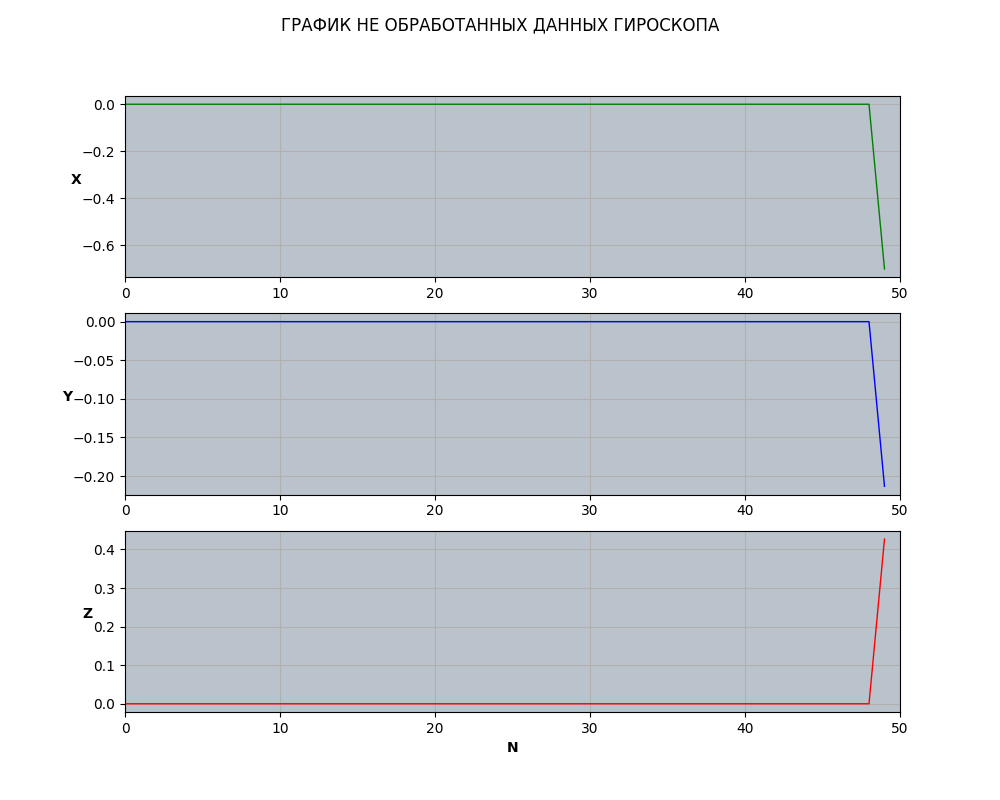

In [26]:
gyro_grafics2D_raw = Figure2D( gyro_opt_raw, IMU.GyroArrRaw )
gyro_grafics2D_raw.CreateVectorFigure()

gyro_grafics2D_raw_anim = an.FuncAnimation(  fig=gyro_grafics2D_raw.Figure\
                                            ,func=gyro_grafics2D_raw.UpdateAnimation\
                                            ,interval=200\
                                            ,frames=200\
                                            ,blit = True)
plt.show()

### Блок визуализации не обработанных данных Магнитометра

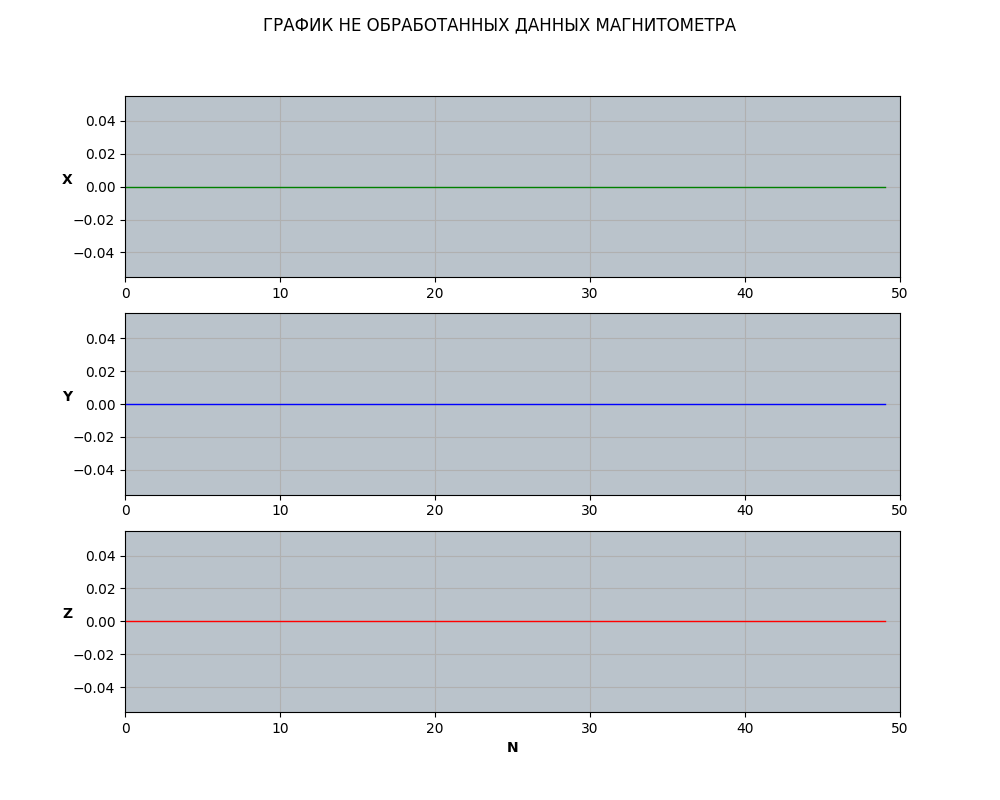

In [27]:
mag_grafics2D_raw = Figure2D( mag_opt_raw, IMU.MagArrRaw )
mag_grafics2D_raw.CreateVectorFigure()

mag_grafics2D_raw_anim = an.FuncAnimation(  fig=mag_grafics2D_raw.Figure\
                                           ,func=mag_grafics2D_raw.UpdateAnimation\
                                           ,interval=200\
                                           ,frames=200\
                                           ,blit = True)
plt.show()